In [30]:
# Import Libraries

import pandas as pd
import numpy as np

# Many machine learning algorithms, such as KMeans, SVM, and PCA, perform better when the data is standardized.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Data Gathering

In [3]:
df = pd.read_csv('customer_segmentation_data.csv')
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [4]:
# EDA

In [5]:
data=df.copy()

In [6]:
df.head(5)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [8]:
df.shape

(1000, 9)

In [9]:
df.dtypes

id                        int64
age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

In [10]:
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [11]:
df.drop('id',axis=1,inplace=True)

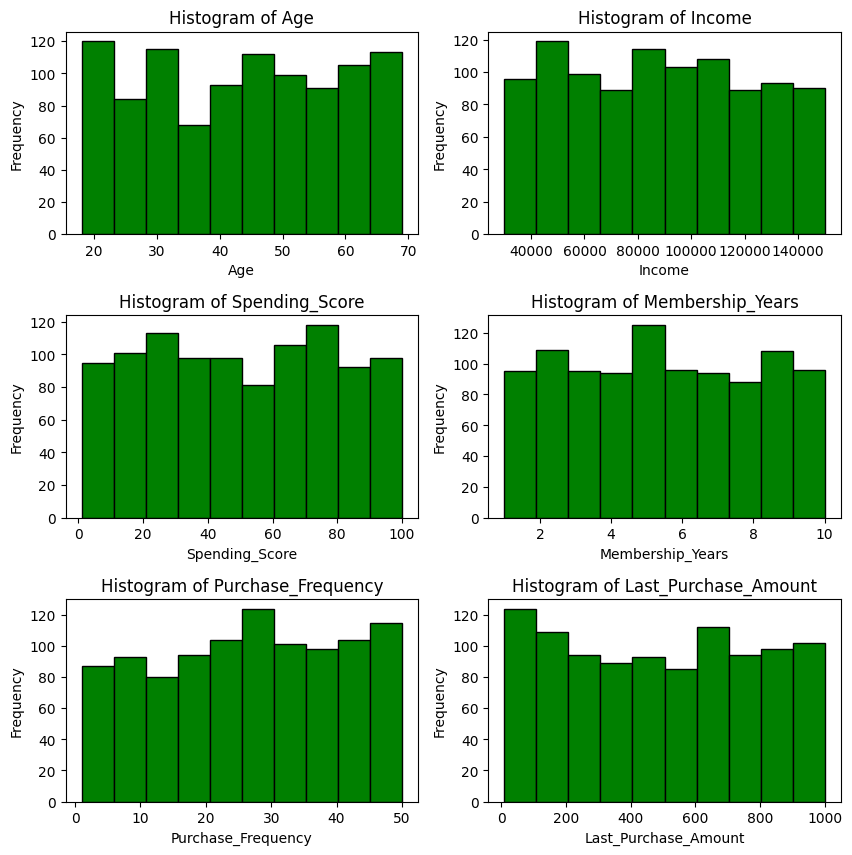

In [12]:
numerical_features = ['age','income','spending_score','membership_years','purchase_frequency','last_purchase_amount']

fig,axes = plt.subplots(3,2,figsize=(10,10))

for i,column_name in enumerate(numerical_features):
  ax = axes[i//2,i%2]
  df[column_name].hist(bins=10, ax=ax, edgecolor='black',color='green')
  ax.set_title(f'Histogram of {column_name.title()}') 
  ax.set_xlabel(column_name.title()) 
  ax.set_ylabel('Frequency') 
  ax.grid(False)

plt.subplots_adjust(hspace=0.4)

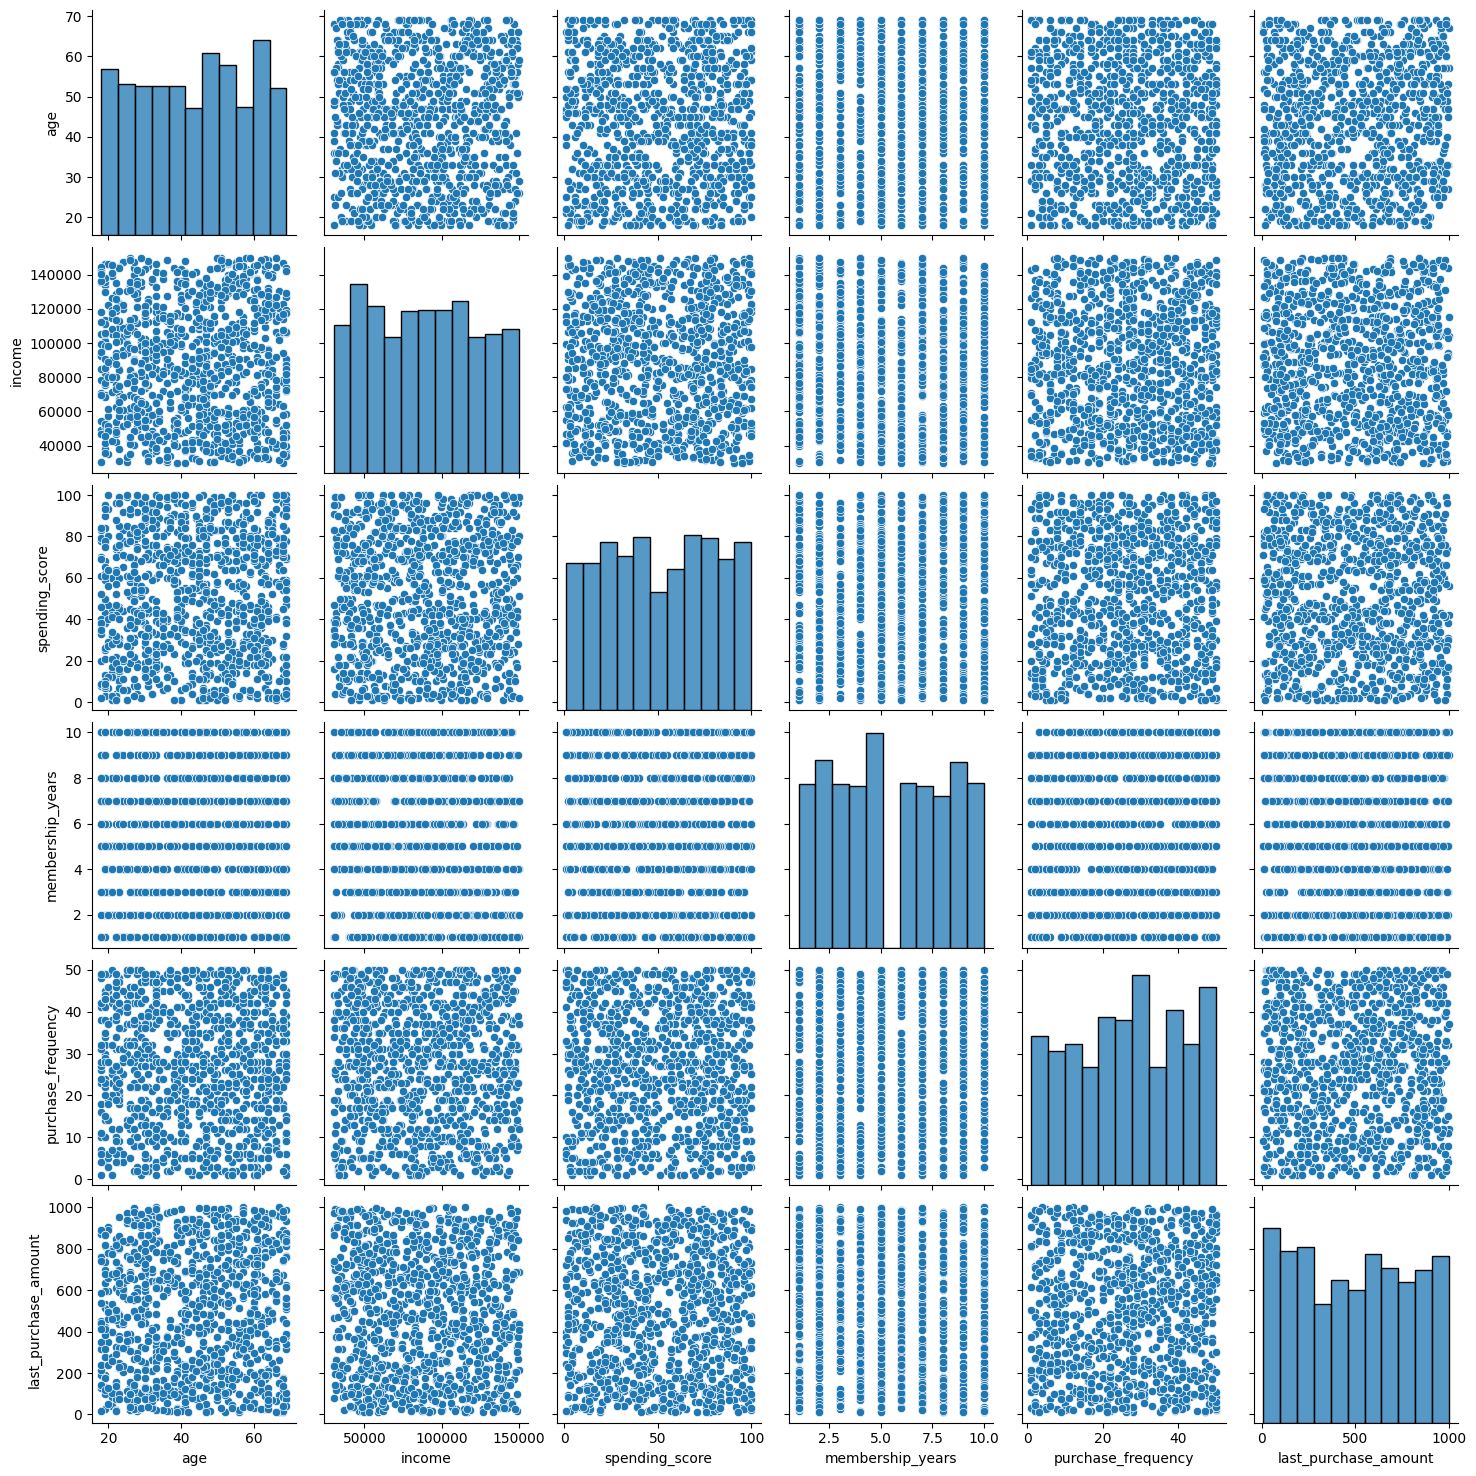

In [13]:
sns.pairplot(df)
plt.show()

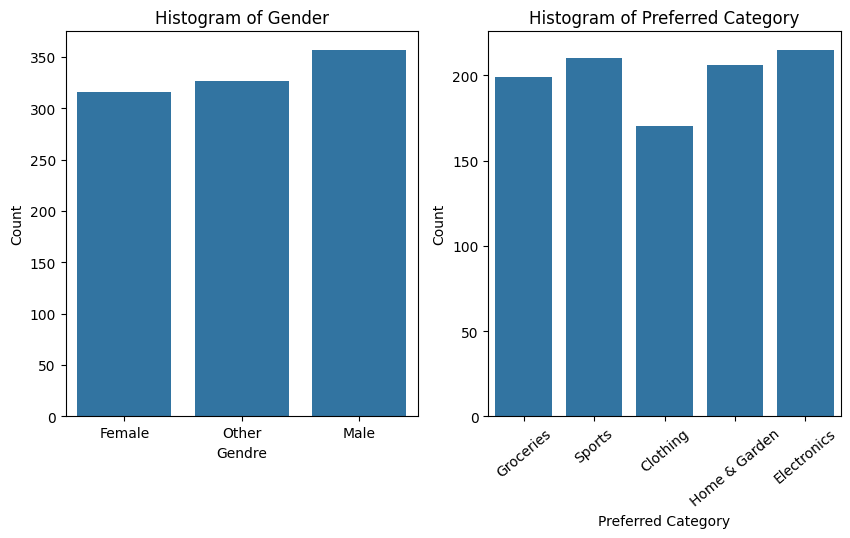

<Figure size 640x480 with 0 Axes>

In [14]:
categorical_column=['age','preferred_category']

fig,axes = plt.subplots(1,2,figsize=(10,5))

sns.countplot(x='gender',data=df,ax=axes[0],)
axes[0].set_title('Histogram of Gender')
axes[0].set_xlabel('Gendre')
axes[0].set_ylabel('Count')


sns.countplot(x='preferred_category',data=df,ax=axes[1])
axes[1].set_title('Histogram of Preferred Category')
axes[1].set_xlabel('Preferred Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x',rotation=40)

plt.show()
plt.tight_layout()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [16]:
df.dtypes

age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

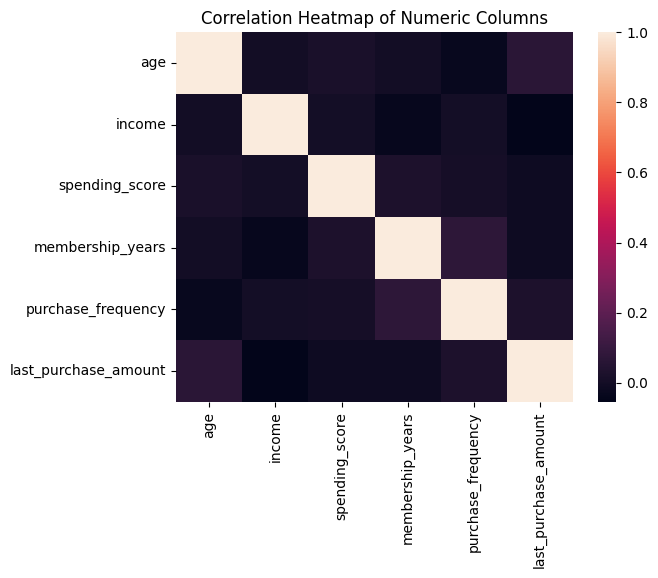

In [19]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
# Feature Engineering

In [23]:
df.select_dtypes("object").nunique()

gender                3
preferred_category    5
dtype: int64

In [24]:
df=pd.get_dummies(df,columns=['gender','preferred_category'],drop_first=True)
df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,38,99342,90,3,24,113.53,False,False,False,True,False,False
1,21,78852,60,2,42,41.93,False,False,False,False,False,True
2,60,126573,30,2,28,424.36,False,False,False,False,False,False
3,40,47099,74,9,5,991.93,False,True,False,False,True,False
4,65,140621,21,3,25,347.08,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,57,112170,57,6,1,313.64,True,False,False,False,False,False
996,23,65337,76,10,23,632.83,False,True,False,True,False,False
997,23,113097,40,5,42,75.09,True,False,False,False,False,True
998,22,113695,63,7,44,505.16,False,False,True,False,False,False


In [25]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

D:\anaconda\envs\new_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\anaconda\envs\new_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "D:\anaconda\envs\new_env\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "D:\anaconda\envs\new_env\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\anaconda\envs\new_env\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


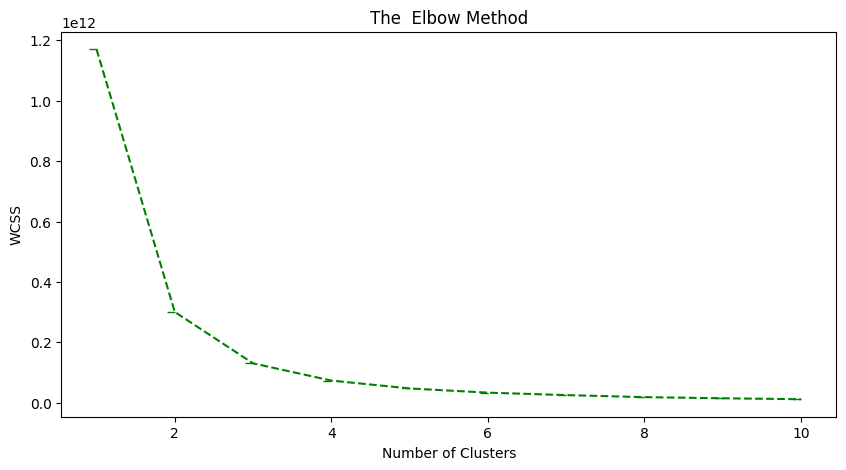

In [26]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker=0,color='green',linestyle='--')
plt.title('The  Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

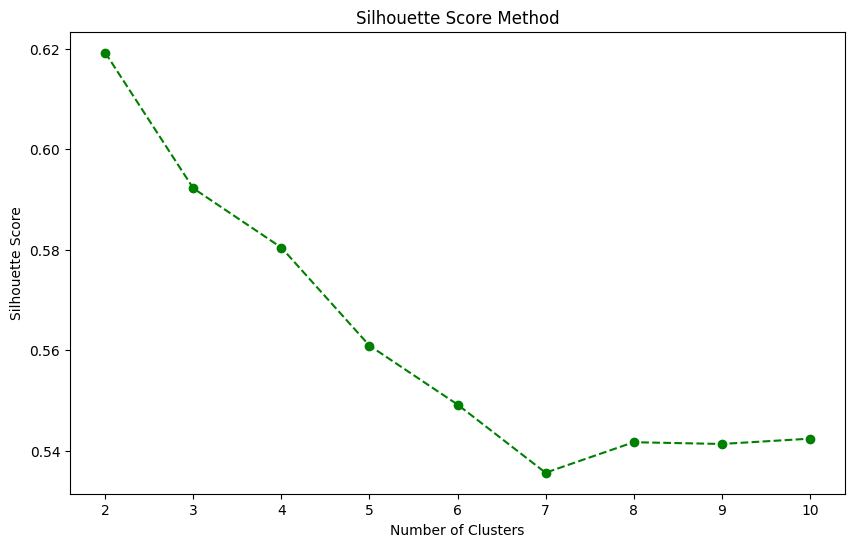

In [29]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_ = kmeans.fit_predict(df)
    score = silhouette_score(df, labels_)
    silhouette_scores.append(score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

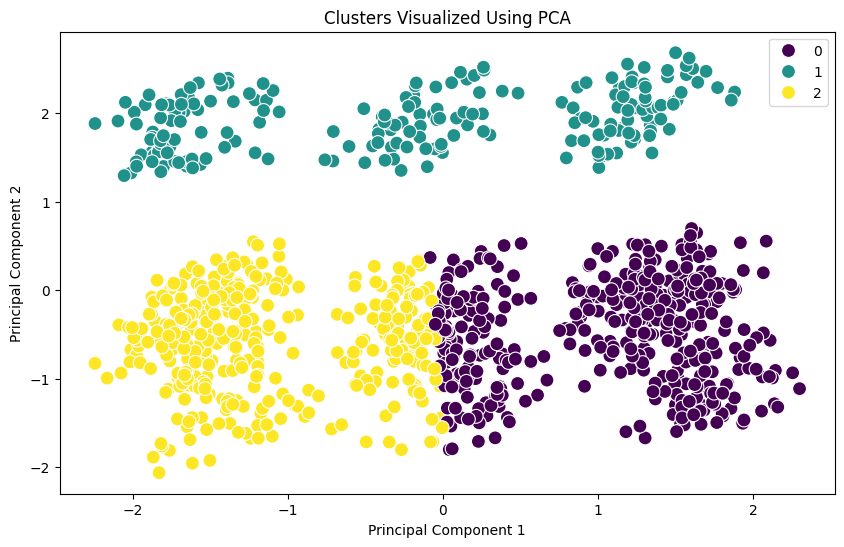

In [31]:
# Step 1: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_data = pca.fit_transform(scaled_data)

# Step 3: Run KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose number of clusters
labels = kmeans.fit_predict(pca_data)

# Step 4: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='viridis', s=100)

plt.title('Clusters Visualized Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

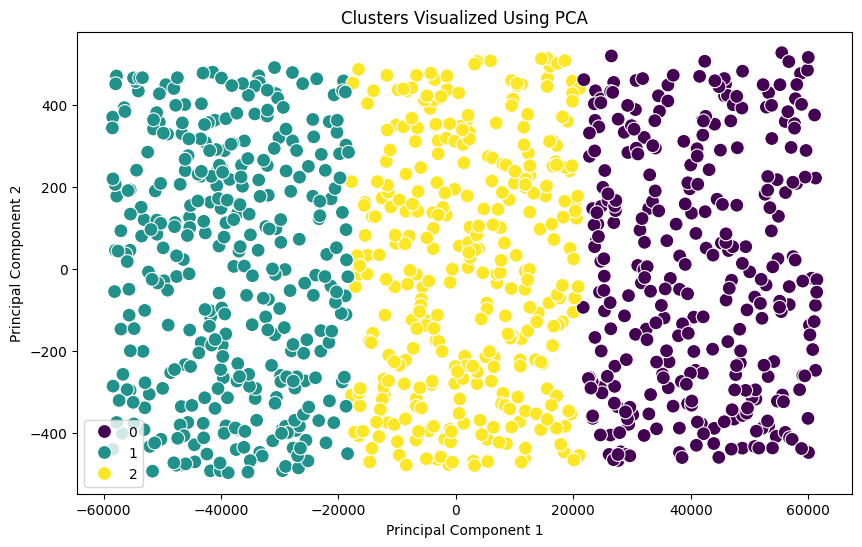

In [32]:
pca = PCA(n_components=2,random_state=42)
pca_components = pca.fit_transform(df.drop('cluster',axis=1,errors='ignore'))

df['PCA1']=pca_components[:,0]
df['PCA2']=pca_components[:,1]

kmeans = KMeans(n_clusters=3,random_state=2)
labels = kmeans.fit_predict(df.drop(['cluster','PCA1','PCA2'], axis = 1,errors='ignore'))

df['cluster'] = labels

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=df,palette='viridis',s=100)
plt.title('Clusters Visualized Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [33]:
Label_0 = df[df['cluster'] == 0]
Label_1 = df[df['cluster'] == 1]
Label_2 = df[df['cluster'] == 2]

print(f"Label 0 shape is: {Label_0.shape}")
print(f"Label 1 shape is: {Label_1.shape}")
print(f"Label 2 shape is: {Label_2.shape}")


Label 0 shape is: (312, 15)
Label 1 shape is: (351, 15)
Label 2 shape is: (337, 15)


In [34]:
data["Clusters"]=labels

In [35]:
Segment1 = data.loc[(data["Clusters"] == 0)]
Segment2 = data.loc[(data["Clusters"] == 1)]
Segment3 = data.loc[(data["Clusters"] == 2)]

In [36]:
Segment1.head(2)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
2,3,60,Female,126573,30,2,28,Clothing,424.36,0
4,5,65,Female,140621,21,3,25,Electronics,347.08,0


In [37]:
Segment2.head(2)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,1
5,6,31,Other,57305,24,3,30,Home & Garden,86.85,1


In [38]:
Segment3.head(2)

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
0,1,38,Female,99342,90,3,24,Groceries,113.53,2
1,2,21,Female,78852,60,2,42,Sports,41.93,2


In [39]:
# Convert gender to numeric values (e.g., Male = 0, Female = 1, Other = 2)
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})

C:\Users\HP\AppData\Local\Temp\ipykernel_4412\4139353329.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})


In [40]:
data

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Clusters
0,1,38,1,99342,90,3,24,Groceries,113.53,2
1,2,21,1,78852,60,2,42,Sports,41.93,2
2,3,60,1,126573,30,2,28,Clothing,424.36,0
3,4,40,2,47099,74,9,5,Home & Garden,991.93,1
4,5,65,1,140621,21,3,25,Electronics,347.08,0
...,...,...,...,...,...,...,...,...,...,...
995,996,57,0,112170,57,6,1,Clothing,313.64,0
996,997,23,2,65337,76,10,23,Groceries,632.83,1
997,998,23,0,113097,40,5,42,Sports,75.09,0
998,999,22,1,113695,63,7,44,Electronics,505.16,0


In [41]:
data.dtypes

id                        int64
age                       int64
gender                    int64
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
Clusters                  int32
dtype: object

In [42]:
data['preferred_category'].unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

In [43]:
data['preferred_category'] = data['preferred_category'].replace({'Groceries': 0, 'Sports': 1, 'Clothing': 2,'Home & Garden':3,'Electronics':4})

C:\Users\HP\AppData\Local\Temp\ipykernel_4412\1066981583.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['preferred_category'] = data['preferred_category'].replace({'Groceries': 0, 'Sports': 1, 'Clothing': 2,'Home & Garden':3,'Electronics':4})


In [44]:
cluster_profile = data.groupby('Clusters').mean()

cluster_profile['size'] = data['Clusters'].value_counts()
cluster_profile

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,size
Clusters,,,,,,,,,,
0,523.352564,44.794872,0.929487,129406.586538,50.275641,5.326923,26.676282,2.025641,471.646058,312
1,509.501425,44.116809,0.945869,50141.336182,51.082621,5.603989,26.686610,1.994302,510.703048,351
2,469.967359,42.498516,1.032641,90582.599407,50.649852,5.459941,26.427300,2.065282,492.398605,337


C:\Users\HP\AppData\Local\Temp\ipykernel_4412\1375665346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters',y='age',data=data,palette='viridis')


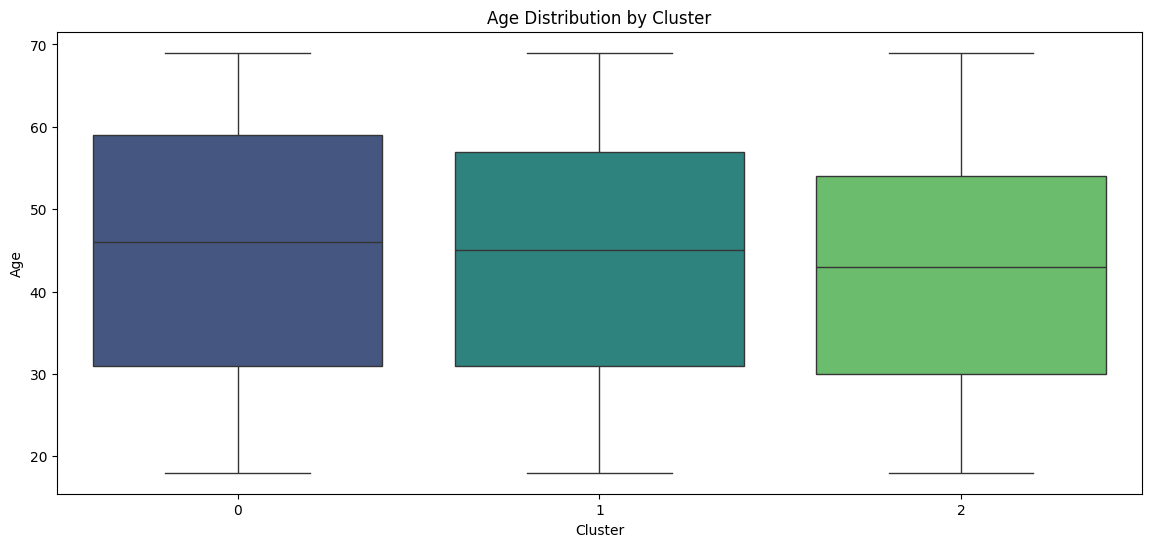

C:\Users\HP\AppData\Local\Temp\ipykernel_4412\1375665346.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clusters',y='last_purchase_amount',data=data,palette='viridis')


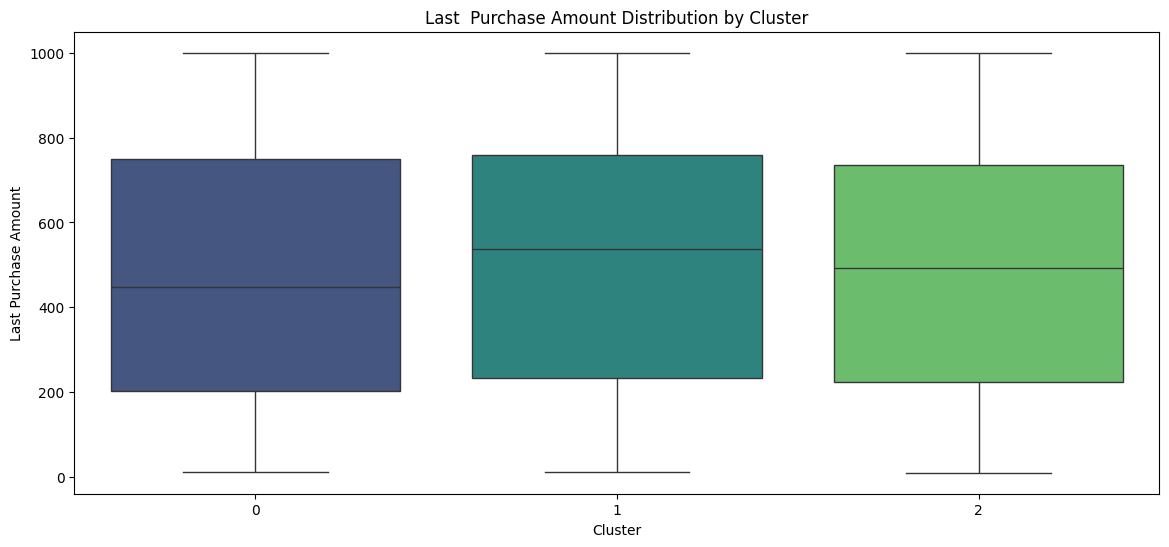

In [45]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Clusters',y='age',data=data,palette='viridis')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x='Clusters',y='last_purchase_amount',data=data,palette='viridis')
plt.title('Last  Purchase Amount Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Last Purchase Amount')
plt.show()

In [46]:
s=Segment1['preferred_category'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts':counts,'per':percent,'per100':percent100})

,counts,per,per100
preferred_category,,,
Electronics,69,0.221154,22.1%
Sports,64,0.205128,20.5%
Groceries,64,0.205128,20.5%
Home & Garden,62,0.198718,19.9%
Clothing,53,0.169872,17.0%


In [47]:
s=Segment2['preferred_category'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts':counts,'per':percent,'per100':percent100})

,counts,per,per100
preferred_category,,,
Groceries,80,0.227920,22.8%
Electronics,77,0.219373,21.9%
Home & Garden,71,0.202279,20.2%
Sports,67,0.190883,19.1%
Clothing,56,0.159544,16.0%


In [48]:
s=Segment3['preferred_category'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts':counts,'per':percent,'per100':percent100})

,counts,per,per100
preferred_category,,,
Sports,79,0.234421,23.4%
Home & Garden,73,0.216617,21.7%
Electronics,69,0.204748,20.5%
Clothing,61,0.181009,18.1%
Groceries,55,0.163205,16.3%


In [49]:
s=Segment1['gender'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts':counts,'per':percent,'per100':percent100})

,counts,per,per100
gender,,,
Male,118,0.378205,37.8%
Female,98,0.314103,31.4%
Other,96,0.307692,30.8%


In [50]:
s=Segment2['gender'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts':counts,'per':percent,'per100':percent100})

,counts,per,per100
gender,,,
Male,129,0.367521,36.8%
Female,112,0.319088,31.9%
Other,110,0.313390,31.3%


In [51]:
s=Segment3['gender'].fillna('No')
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts':counts,'per':percent,'per100':percent100})

,counts,per,per100
gender,,,
Other,121,0.359050,35.9%
Male,110,0.326409,32.6%
Female,106,0.314540,31.5%
